In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = '/feynman/home/dap/lcs/as274094/work/psf_dataset_generation/output/psf_dataset1/'
test_dataset = np.load(data_path + 'test_Euclid_res_20000_TestStars_id_001GT_100_bins.npy', allow_pickle=True)[()]
train_dataset = np.load(data_path + 'train_Euclid_res_52000_TrainStars_id_001GT_100_bins.npy', allow_pickle=True)[()]

In [4]:
n_test_stars = test_dataset['stars'].shape[0]
np.sum(train_dataset['stars'][0:n_test_stars,:,:]-test_dataset['stars'])
np.min(train_dataset['stars'][0:n_test_stars,:,:])-np.min(test_dataset['stars'])

-2.6947209998119644e-09

In [3]:
print(test_dataset['noisy_stars'].shape)
print(train_dataset['noisy_stars'].shape)
index = 20000-25

(20000, 32, 32)
(52000, 32, 32)


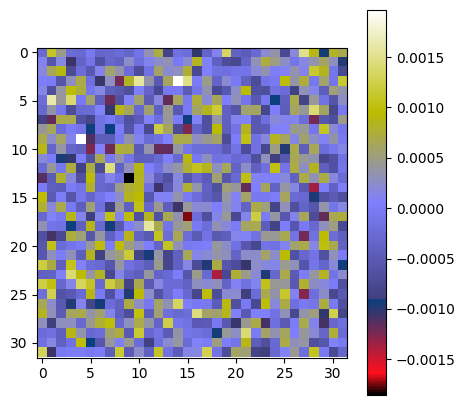

In [6]:
noisy_train_pattern = train_dataset['noisy_stars'][index,:,:] - train_dataset['stars'][index,:,:]
plt.figure(figsize=(5,5))
plt.imshow(noisy_train_pattern, cmap='gist_stern');plt.colorbar()
plt.show()

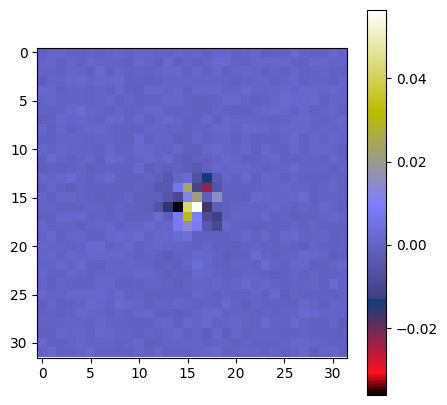

In [7]:
noisy_test_pattern = test_dataset['noisy_stars'][index,:,:] - test_dataset['stars'][index,:,:]
plt.figure(figsize=(5,5))
plt.imshow(noisy_test_pattern, cmap='gist_stern');plt.colorbar()
plt.show()

Class: 6 SNR: 326.9244119301038


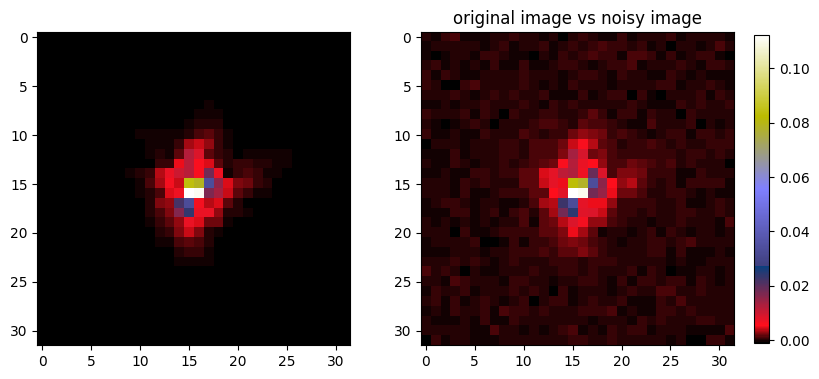

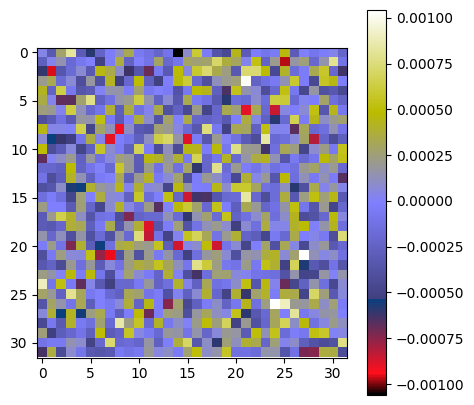

In [6]:
index = 50000 - 3200
fig, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw={'width_ratios': [4, 5]})
axs[0].imshow(train_dataset['stars'][index,:,:], cmap='gist_stern')
im = axs[1].imshow(train_dataset['noisy_stars'][index,:,:], cmap='gist_stern')
fig.colorbar(im, ax=axs[1], shrink=0.4)
plt.title('original image vs noisy image')
plt.show
print('Class:', train_dataset['SED_ids'][index], 'SNR:', train_dataset['SNR'][index])

noisy_train_pattern = train_dataset['noisy_stars'][index,:,:] - train_dataset['stars'][index,:,:]
plt.figure(figsize=(5,5))
plt.imshow(noisy_train_pattern, cmap='gist_stern');plt.colorbar()
plt.show()

Class: 8 SNR: 166.84128375341945


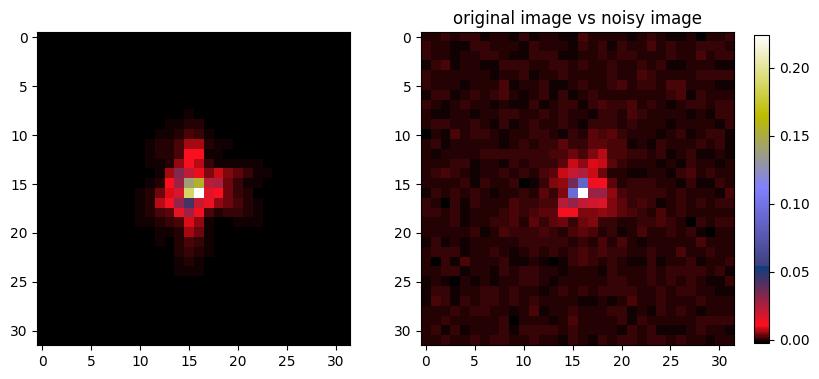

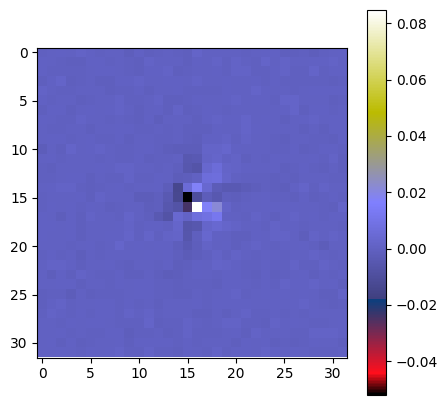

In [10]:
index = 20000 - 19920
fig, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw={'width_ratios': [4, 5]})
axs[0].imshow(test_dataset['stars'][index,:,:], cmap='gist_stern')
im = axs[1].imshow(test_dataset['noisy_stars'][index,:,:], cmap='gist_stern')
fig.colorbar(im, ax=axs[1], shrink=0.4)
plt.title('original image vs noisy image')
plt.show
print('Class:', test_dataset['SED_ids'][index], 'SNR:', test_dataset['SNR'][index])

noisy_test_pattern = test_dataset['noisy_stars'][index,:,:] - test_dataset['stars'][index,:,:]
plt.figure(figsize=(5,5))
plt.imshow(noisy_test_pattern, cmap='gist_stern');plt.colorbar()
plt.show()

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 4], height_ratios=[4, 4])
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]),
       fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])]
#cax = fig.add_subplot(gs[:, -1])
cax = fig.add_axes([0.85, 0.1, 0.05, 0.8])

# Plot the first subplot
im1 = axs[0].imshow(train_dataset['stars'][0,:,:], cmap='gist_stern')

# Plot the second subplot
im2 = axs[1].imshow(train_dataset['stars'][1,:,:], cmap='gist_stern')

# Plot the third subplot
im3 = axs[2].imshow(train_dataset['stars'][2,:,:], cmap='gist_stern')

# Plot the fourth subplot
im4 = axs[3].imshow(train_dataset['stars'][3,:,:], cmap='gist_stern')

# Add a colorbar to the figure
fig.colorbar(im1, cax=cax)

# Adjust the spacing between subplots and the colorbar
plt.subplots_adjust(wspace=0.1, hspace=0.1, right=0.8)

# Show the plot
plt.show()

# SEDs

In [ ]:
train_SEDs = train_dataset['SED_ids']
unique_values, counts = np.unique(train_SEDs, return_counts=True)

for val, count in zip(unique_values, counts):
    if count > 1:
        print(f"{val} repeated {count} times")

print("")
test_SEDs = test_dataset['SED_ids']
unique_values, counts = np.unique(test_SEDs, return_counts=True)

for val, count in zip(unique_values, counts):
    if count > 1:
        print(f"{val} repeated {count} times")

In [ ]:
SED_path = '/feynman/home/dap/lcs/as274094/work/wf-psf/data/SEDs/save_SEDs/'
stellar_SEDs = np.load(SED_path + 'SEDs.npy', allow_pickle=True)
stellar_SEDs.shape